Introdução

Nesta análise exploratória de dados, vamos estudar um conjunto de dados de imóveis com o objetivo de prever o preço das casas utilizando técnicas de inteligência artificial. A base de dados contém informações relevantes, como:

Localização: latitude e longitude

Estrutura do imóvel: número de quartos, banheiros, andares, área construída (area_construida) e área do terreno (area_terreno)


O processo da análise incluirá:

Tratamento dos dados: limpeza de valores ausentes, correção de tipos de dados e padronização das colunas.

Detecção e remoção de outliers: utilizando a metodologia da amplitude interquartil (IQR) para garantir que os valores extremos não distorçam os resultados.

Exploração dos dados: análise estatística, visualizações e resumo das principais características dos imóveis.

Preparação para modelagem: transformação de variáveis e seleção de atributos mais relevantes.

Construção de modelos de inteligência artificial: treinamento e avaliação de modelos para prever o preço dos imóveis, com métricas como R² e RMSE.

Com essa análise, esperamos entender melhor os fatores que influenciam os preços dos imóveis e construir um modelo preditivo confiável, que possa servir como ferramenta de apoio para tomada de decisão no mercado imobiliário.

In [30]:
import pathlib
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn.metrics import r2_score ,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import matplotlib.ticker as mtick

In [31]:
df = pd.read_csv("kc_house_data.csv")
display(df)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


Conferindo dados nulos 


In [32]:


print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64




A coluna sqft_above  apresentava apenas duas entradas nulas, então optei por excluí-la do DataFrame para simplificar a análise.

In [58]:
df = df.dropna()
print(df.isnull().sum())

preco              0
quartos            0
banheiros          0
area_construida    0
area_terreno       0
andares            0
condicao           0
nota               0
area_acima         0
area_sotao         0
ano_construcao     0
latitude           0
longitude          0
dtype: int64


Conferindo tipos de dados

In [34]:
print(df.dtypes)


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


Renomeando colunas para o português 

In [35]:
df.rename(columns={
    'id': 'id',
    'date': 'data',
    'price': 'preco',
    'bedrooms': 'quartos',
    'bathrooms': 'banheiros',
    'sqft_living': 'area_construida',
    'sqft_lot': 'area_terreno',
    'floors': 'andares',
    'waterfront': 'vista_agua',
    'view': 'vista',
    'condition': 'condicao',
    'grade': 'nota',
    'sqft_above': 'area_acima',
    'sqft_basement': 'area_sotao',
    'yr_built': 'ano_construcao',
    'yr_renovated': 'ano_reforma',
    'zipcode': 'cep',
    'lat': 'latitude',
    'long': 'longitude',
    'sqft_living15': 'area_vizinhos',
    'sqft_lot15': 'terreno_vizinhos'
}, inplace=True)

A variável data ,id ,cep e ano_reforma não será utilizada nesta análise, uma vez que não será considerada relevante para a predição do preço.

In [36]:

df= df.drop(["id","data","cep","ano_reforma","vista","vista_agua","area_vizinhos","terreno_vizinhos",],axis=1)

display(df)


,preco,quartos,banheiros,area_construida,area_terreno,andares,condicao,nota,area_acima,area_sotao,ano_construcao,latitude,longitude
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180.0,0,1955,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170.0,400,1951,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,3,6,770.0,0,1933,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050.0,910,1965,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680.0,0,1987,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,3,8,1530.0,0,2009,47.6993,-122.346
21609,400000.0,4,2.50,2310,5813,2.0,3,8,2310.0,0,2014,47.5107,-122.362
21610,402101.0,2,0.75,1020,1350,2.0,3,7,1020.0,0,2009,47.5944,-122.299
21611,400000.0,3,2.50,1600,2388,2.0,3,8,1600.0,0,2004,47.5345,-122.069


Durante a análise exploratória, identificamos correlações altas (acima de 0,70) entre algumas variáveis, como area_construida e area_acima. Embora a correlação elevada possa indicar redundância de informação, optamos por manter essas variáveis no dataset para avaliar sua importância durante a etapa de modelagem. A decisão de removê-las ou mantê-las será baseada em sua contribuição real para o desempenho do modelo.

<Axes: >

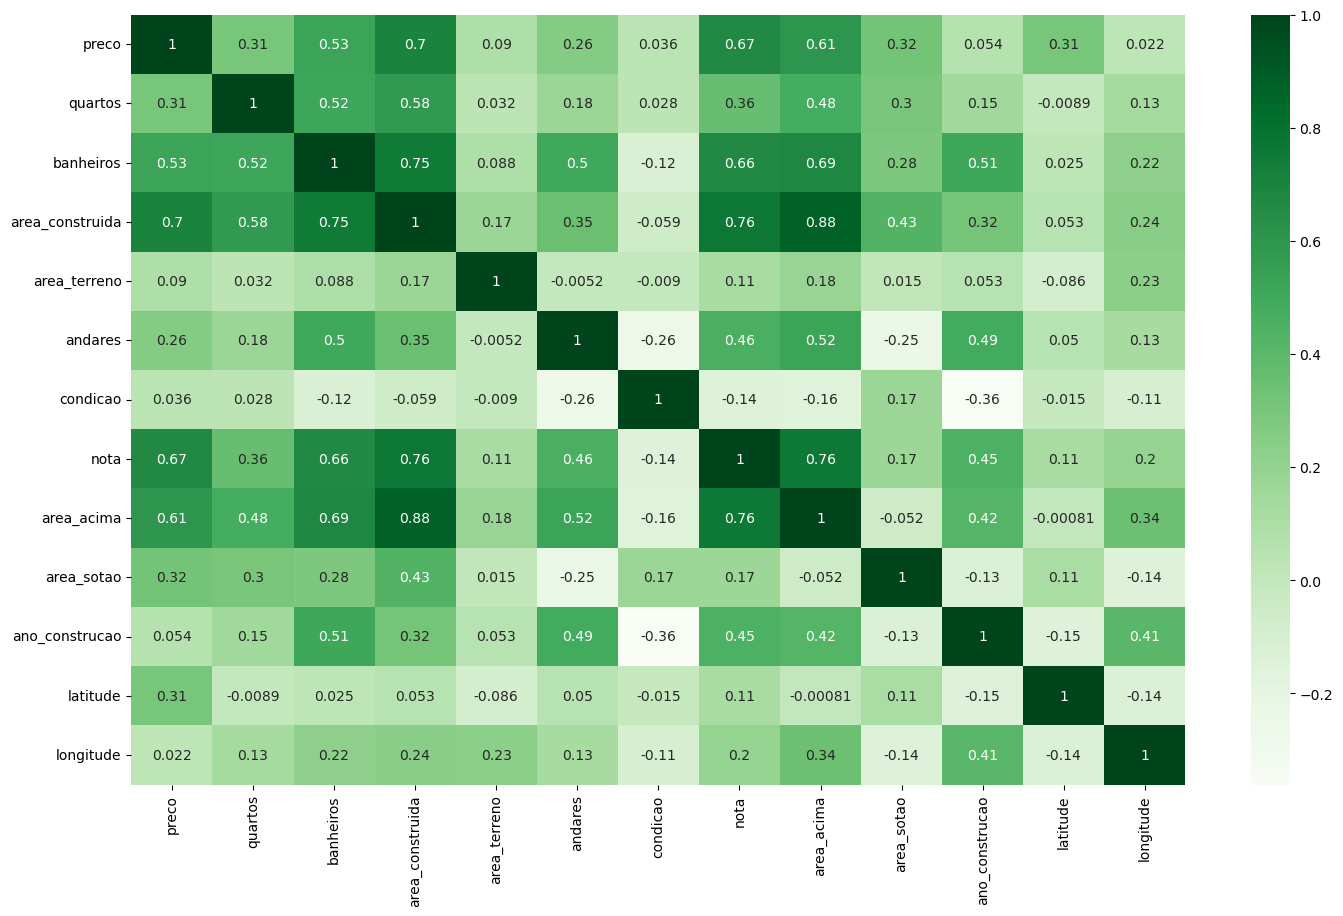

In [37]:
plt.figure(figsize=(17,10))
numero = df.select_dtypes("number")
sns.heatmap(numero.corr() , annot=True ,cmap="Greens")


Iremos criar nossas funções para análisar e excluir outliers

In [38]:
def limite (coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3-q1
    return q1 -1.5* amplitude , q3 +1.5* amplitude


print(limite(df["preco"]))

def excluir_outliers(df , coluna):
    linhas = df.shape[0]
    lim_inf , lim_sup = limite(df[coluna])
    df = df.loc[(df[coluna]>= lim_inf)  & (df[coluna]<= lim_sup)]
    linha = df.shape[0]
    linhas_removidas = linhas -linha
    return df , linhas_removidas 

(-163187.5, 1129912.5)


In [39]:


def diagrama_caixa(coluna):
    fig , (ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(15,5)
    
    # Boxplots
    sns.boxplot(x=coluna, ax=ax1)
    sns.boxplot(x=coluna, ax=ax2)
    
    # Ajustar limites do segundo boxplot
    ax2.set_xlim(limite(coluna))  # Supondo que sua função 'limite' retorna algo como (min, max)
    
    # Formatar eixos para números grandes
    ax1.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
    ax2.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
    plt.setp(ax1.get_xticklabels(), rotation=90)
    
    plt.show()

In [40]:
print(df.dtypes)


preco              float64
quartos              int64
banheiros          float64
area_construida      int64
area_terreno         int64
andares            float64
condicao             int64
nota                 int64
area_acima         float64
area_sotao           int64
ano_construcao       int64
latitude           float64
longitude          float64
dtype: object


Início do tratamento de outliers

Neste momento, iniciaremos o tratamento dos outliers. Para isso, analisaremos cada coluna individualmente para decidir se os outliers devem ser removidos ou mantidos, considerando o impacto que podem ter na análise .

Preço

Na análise da coluna Preço, identificamos uma discrepância significativa causada pelos outliers. Diante disso, optaremos pela remoção desses valores extremos para garantir maior qualidade nos dados e evitar distorções nas análises futuras.

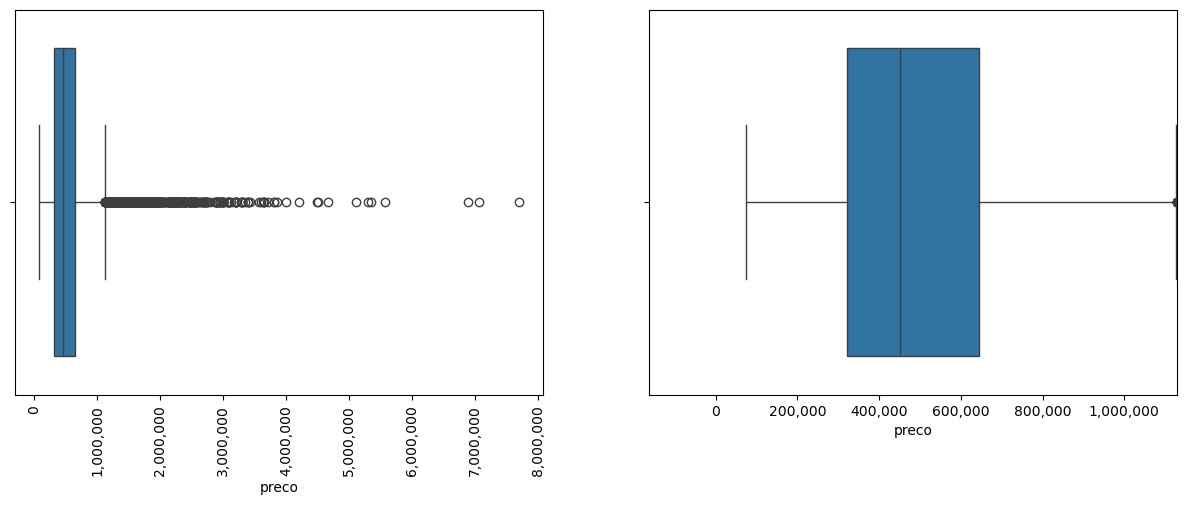

Total de linhas excluidas foram :1146


In [41]:
diagrama_caixa(df["preco"])
df , linhas=excluir_outliers(df , "preco")
print(f"Total de linhas excluidas foram :{linhas}")


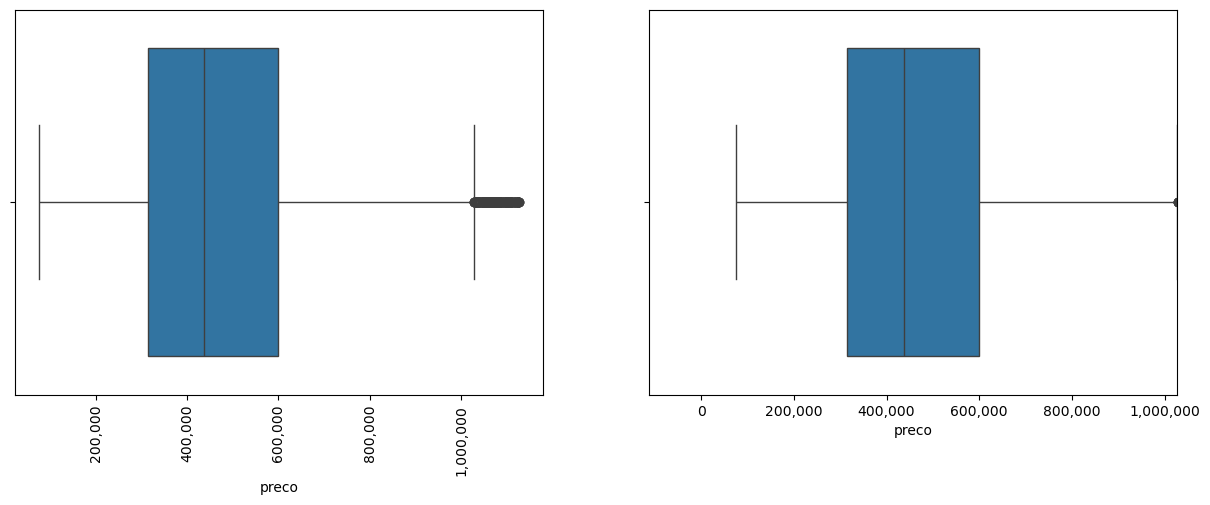

In [42]:
diagrama_caixa(df["preco"])


Quartos

Na análise da coluna Quartos, identificamos uma discrepância significativa causada pelos outliers. Diante disso, optaremos pela remoção desses valores extremos para garantir maior qualidade nos dados e evitar distorções nas análises futuras.

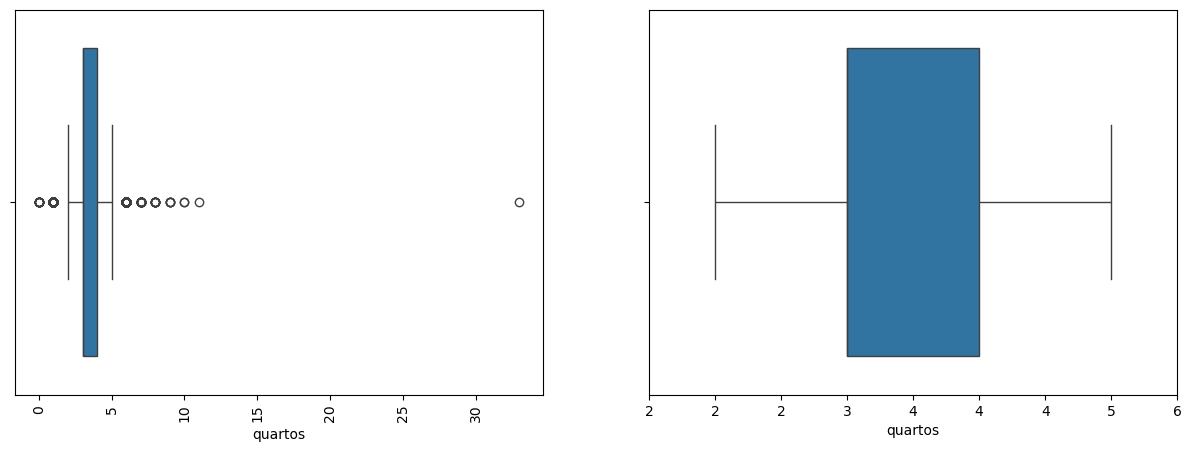

Total de linhas excluidas foram :487


In [43]:
diagrama_caixa(df['quartos'])

df , linhas=excluir_outliers(df , "quartos")
print(f"Total de linhas excluidas foram :{linhas}")


Banheiros

A coluna Banheiros apresentava poucos outliers, em quantidade tão pequena que decidimos removê-los diretamente para simplificar o tratamento dos dados.

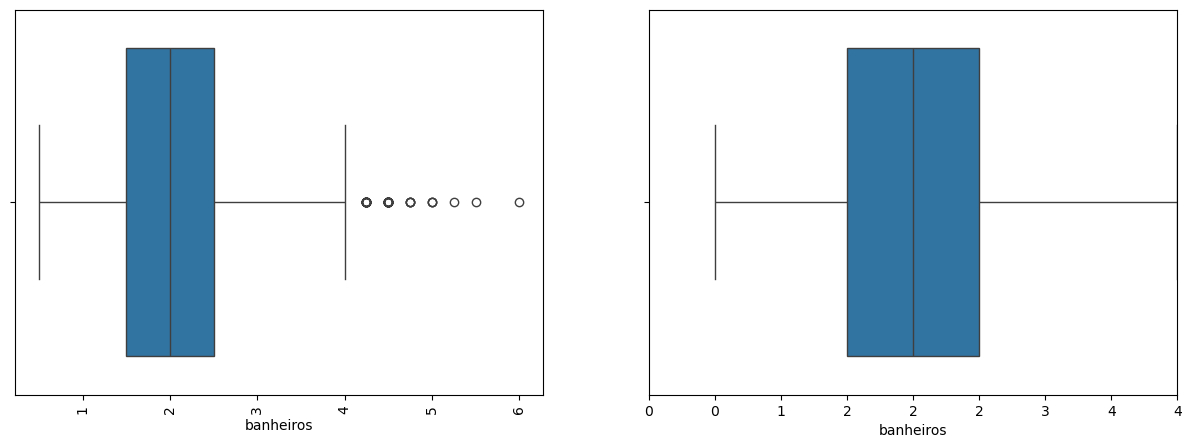

Total de linhas excluidas foram :67


In [44]:
diagrama_caixa(df["banheiros"])

df , linhas=excluir_outliers(df , "banheiros")
print(f"Total de linhas excluidas foram :{linhas}")


Area construida

Na análise da coluna area_costruida, identificamos uma discrepância significativa causada pelos outliers. Diante disso, optaremos pela remoção desses valores extremos para garantir maior qualidade nos dados e evitar distorções nas análises futuras.

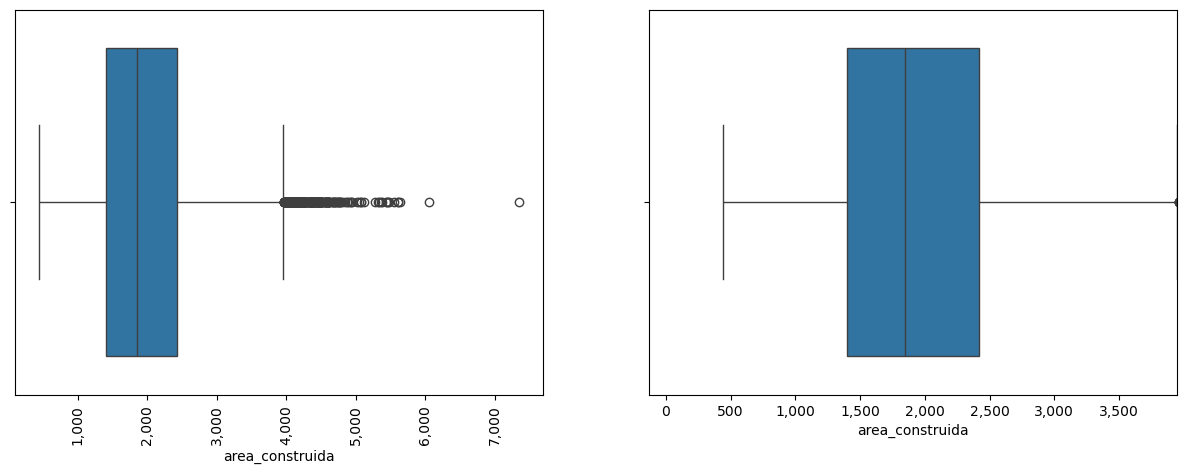

Total de linhas excluidas foram :264


In [45]:
diagrama_caixa(df["area_construida"])


df , linhas=excluir_outliers(df , "area_construida")
print(f"Total de linhas excluidas foram :{linhas}")

Área do Terreno

Foram identificados valores muito discrepantes na coluna Área do Terreno, que fogem da redundância esperada e podem prejudicar a análise. Por esse motivo, optamos por remover esses outliers para garantir maior consistência nos dados.

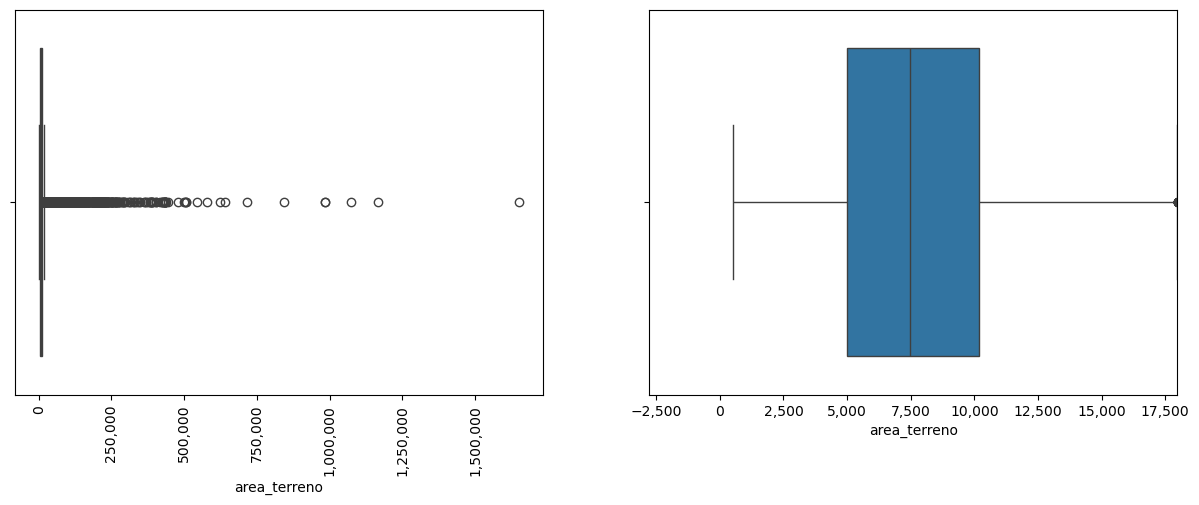

Total de linhas excluidas foram :2060


In [46]:
diagrama_caixa(df['area_terreno'])

df , linhas=excluir_outliers(df , "area_terreno")
print(f"Total de linhas excluidas foram :{linhas}")



Andares

A coluna Andares apresentava poucos outliers, em quantidade tão pequena que decidimos removê-los diretamente para simplificar o tratamento dos dados.

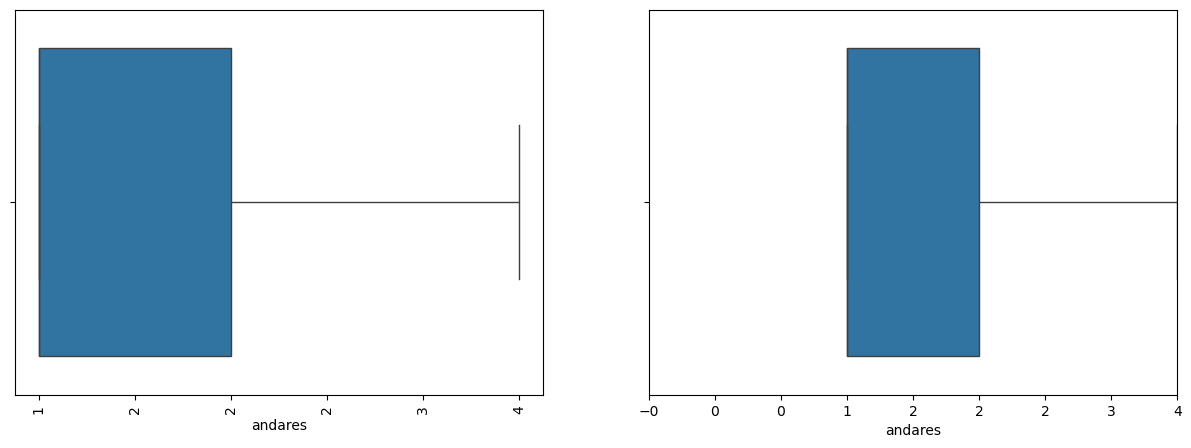

Total de linhas excluidas foram :331


In [47]:
diagrama_caixa(df['andares'])


df , linhas=excluir_outliers(df , "area_terreno")
print(f"Total de linhas excluidas foram :{linhas}")


Condição do Imóvel

A coluna Condição do Imóvel representa uma avaliação subjetiva (ou nota) da propriedade. Apesar da presença de possíveis outliers, optamos por não removê-los, pois esses valores podem refletir variações reais na percepção ou no estado do imóvel, sendo informações relevantes para a análise.

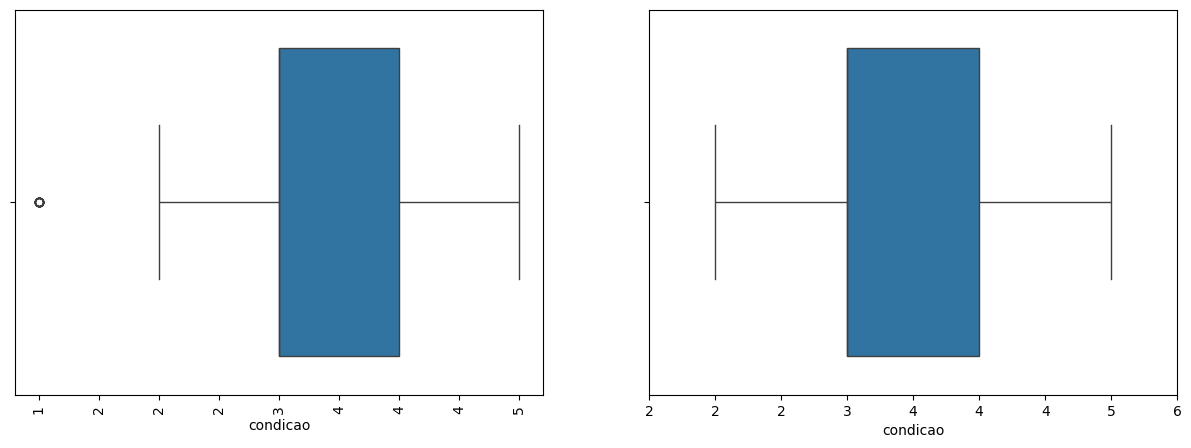

In [48]:
diagrama_caixa(df['condicao'])



A coluna Nota Geral apresenta valores de 1 a 13, onde:

1 a 3 indicam pequenas construções,

7 representa construções com design e acabamento medianos,

11 a 13 correspondem a construções de alto padrão.

Apesar de alguns valores parecerem destoantes à primeira vista, optamos por não remover os outliers, pois eles refletem variações reais no padrão das construções e são importantes para manter a representatividade dos dados.

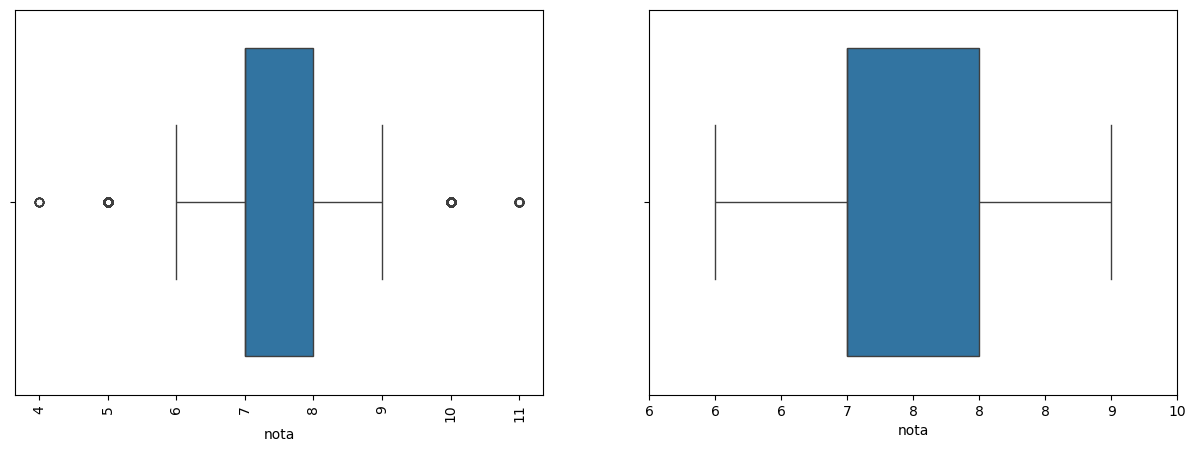

In [49]:
diagrama_caixa(df['nota'])



Area acima

A coluna Area_acima apresentava poucos outliers, em quantidade tão pequena que decidimos removê-los diretamente para simplificar o tratamento dos dados.

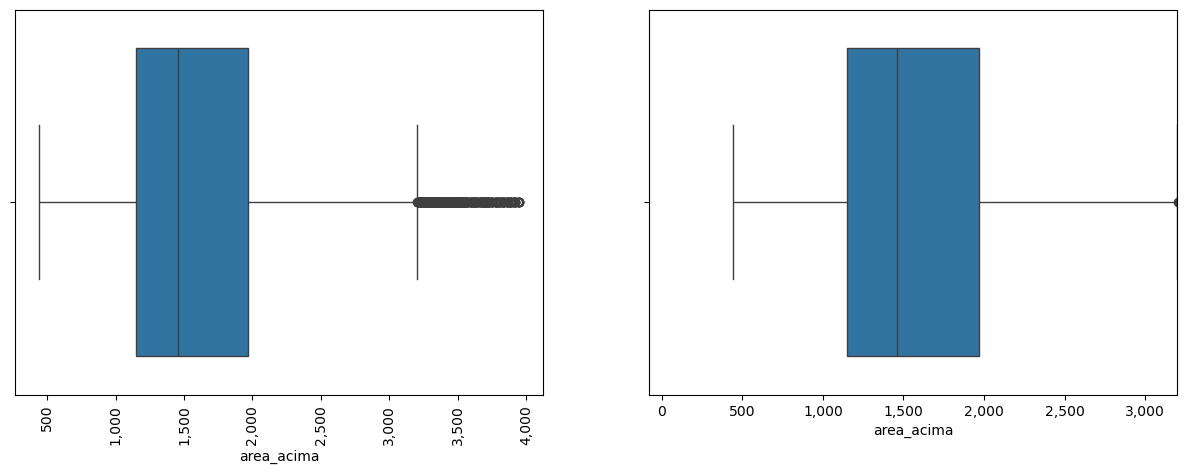

Total de linhas excluidas foram :458


In [50]:
diagrama_caixa(df['area_acima'])
df , linhas=excluir_outliers(df , "area_acima")
print(f"Total de linhas excluidas foram :{linhas}")

Area Sotao

Na análise da coluna area_sotao, identificamos uma discrepância significativa causada pelos outliers. Diante disso, optaremos pela remoção desses valores extremos para garantir maior qualidade nos dados e evitar distorções nas análises futuras.

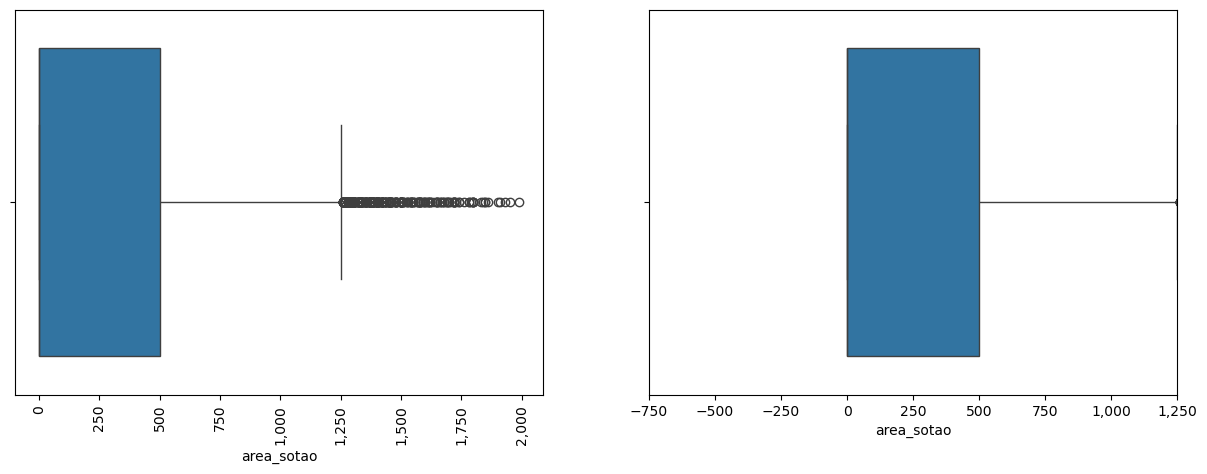

Total de linhas excluidas foram :309


In [51]:
diagrama_caixa(df['area_sotao'])
df , linhas=excluir_outliers(df , "area_sotao")
print(f"Total de linhas excluidas foram :{linhas}")

Ano do Imóvel

Optamos por não realizar nenhum tratamento de outliers na coluna Ano do Imóvel, pois cada imóvel é único em sua data de construção. Valores distintos nessa variável refletem a diversidade natural do conjunto de dados e são relevantes para a análise.

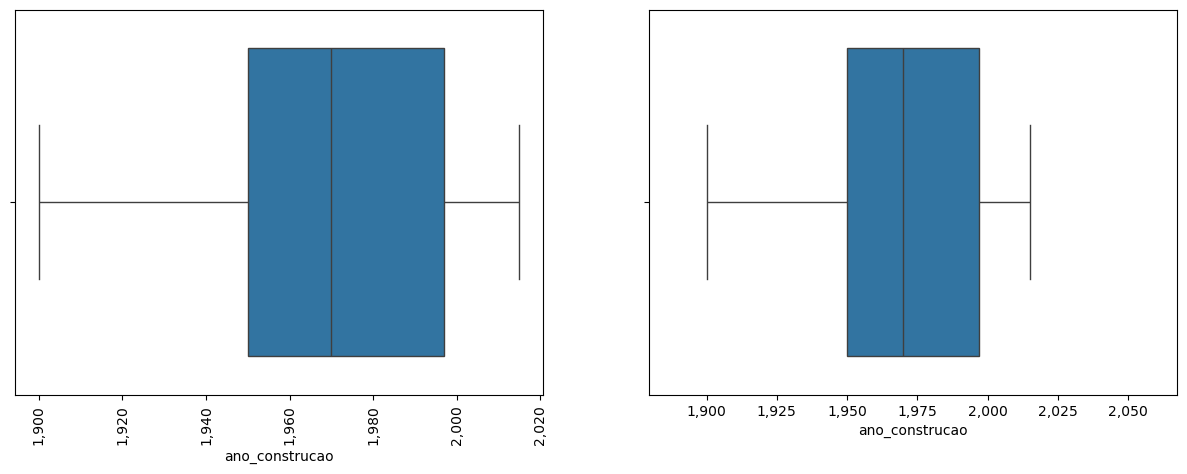

In [52]:
diagrama_caixa(df['ano_construcao']) 

Para enriquecer a análise exploratória dos dados, desenvolvi uma visualização interativa utilizando um mapa de densidade, com o objetivo de observar a distribuição espacial dos preços dos imóveis.

In [53]:
amostra = df
centro_mapa = {"lat": amostra.latitude.mean(), "lon": amostra.longitude.mean()}
mapa = px.density_mapbox(amostra , lat="latitude",lon = "longitude",z = "preco" ,radius=5,center = centro_mapa,zoom=10, mapbox_style="open-street-map")
mapa.show()

Início da Etapa de Previsão

Com a análise exploratória e o tratamento dos dados concluídos, agora daremos início à etapa de modelagem preditiva. O objetivo é construir modelos capazes de prever o preço dos imóveis com base nas variáveis disponíveis no conjunto de dados.

 Avalia a performance de um modelo de regressão com base nas métricas R² e RMSE.
 

In [54]:
def avaliar_modelo(modelo , y_test ,previsao):
    r2 = r2_score(y_test, previsao)
    RMSE = np.sqrt(mean_squared_error(y_test , previsao))
    return f"modelo {modelo}\n R² :{r2}\n RSME : {RMSE:.2f}"

 Foram definidos e organizados três algoritmos de regressão supervisionada para prever o preço dos imóveis:

In [55]:
modelo_forest = RandomForestRegressor()
modelo_lr = LinearRegression()
modelo_tree = ExtraTreesRegressor()

modelos = {'RandomForestRegressor':modelo_forest ,'LinearRegression' : modelo_lr,'ExtraTreesRegressor':modelo_tree}




Treinamento e Avaliação dos Modelos

In [56]:
X = df.drop("preco",axis=1)
y = df["preco"]

X_train , X_test ,y_train ,y_test =train_test_split(X,y,train_size=0.2, random_state=42)

for nome , modelo in modelos.items():
    modelo.fit(X_train,y_train)
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome , y_test,previsao))




modelo RandomForestRegressor
 R² :0.8298739624702265
 RSME : 78737.46
modelo LinearRegression
 R² :0.6500692592925351
 RSME : 112924.21
modelo ExtraTreesRegressor
 R² :0.8179211575880607
 RSME : 81456.50


Análise da Importância das Variáveis (Feature Importance)

,0
latitude,0.475635
area_construida,0.271799
longitude,0.065248
nota,0.047760
ano_construcao,0.038948
area_acima,0.036990
area_terreno,0.028178
banheiros,0.011100
area_sotao,0.009367
condicao,0.005946


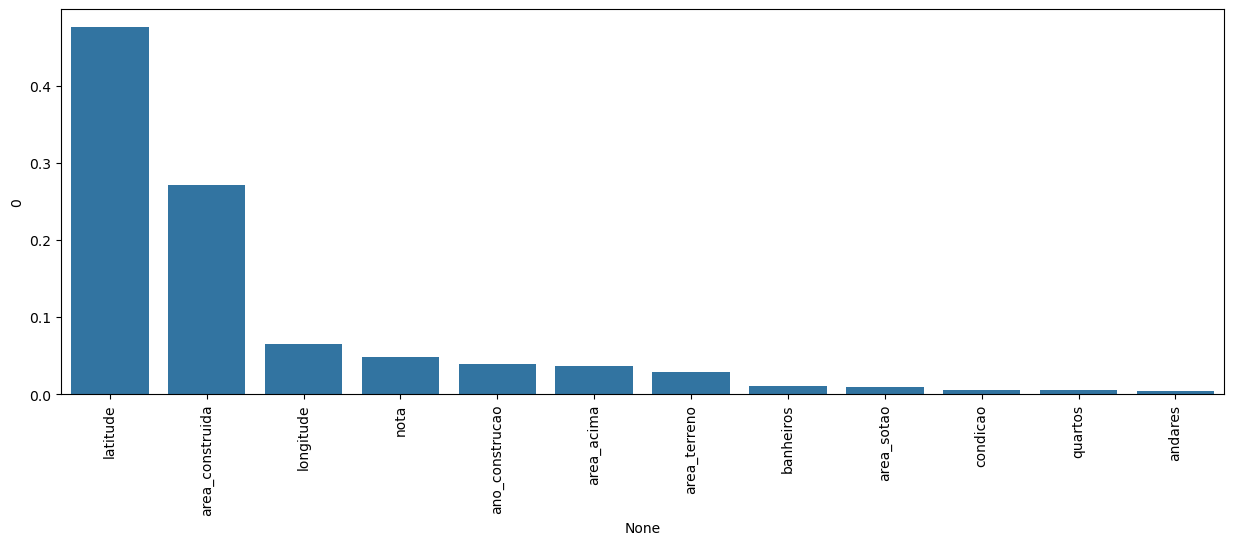

In [57]:
importancia_feature = pd.DataFrame(modelo_forest.feature_importances_ , X_train.columns)
importancia_feature = importancia_feature.sort_values(by=0,ascending=False)
display(importancia_feature)

plt.figure(figsize=(15,5))
ax = sns.barplot(x=importancia_feature.index, y=importancia_feature[0])
ax.tick_params(axis="x" ,rotation = 90)

Modelo Escolhido: RandomForestRegressor

Após testar diferentes algoritmos de regressão para prever o preço dos imóveis, o modelo Random Forest Regressor foi selecionado como o modelo final do projeto.
 
 O Random Forest foi escolhido pelos seguintes motivos:

Melhor desempenho geral entre os modelos testados: apresentou o maior R² (0.83), indicando que explica melhor a variabilidade dos preços.

Menor erro de previsão (RMSE): cerca de R$ 78 mil de erro médio, o que é o menor entre os modelos.

Alta robustez e estabilidade: por ser um modelo baseado em múltiplas árvores de decisão, ele lida bem com variáveis não lineares, outliers e relações complexas entre as variáveis.

Boa interpretabilidade: permite análise de importância das variáveis, o que ajuda a entender quais fatores mais influenciam no preço.


